In [3]:
import pandas as pd
sentiment_df = pd.read_csv('/content/dataset.csv')
sentiment_df.head()

,Date,Value,Value_Classification,BTC_Closing,BTC_Volume
0,2018-02-01,30.0,Fear,9170.540039,9959400448
1,2018-02-02,15.0,Extreme Fear,8830.750000,12726899712
2,2018-02-03,40.0,Fear,9174.910156,7263790080
3,2018-02-04,24.0,Extreme Fear,8277.009766,7073549824
4,2018-02-05,11.0,Extreme Fear,6955.270020,9285289984


In [4]:
sentiment_df['Date'] = pd.to_datetime(sentiment_df['Date'])
sentiment_df = sentiment_df.sort_values(by='Date')
print(sentiment_df.isnull().sum())
sentiment_df = sentiment_df.rename(columns={
    'Value': 'Sentiment_Value',
    'Value_Classification': 'Sentiment_Label',
    'BTC_Closing': 'BTC_Close',
    'BTC_Volume': 'BTC_Volume'
})
sentiment_df.head()

Date                    0
Value                   3
Value_Classification    3
BTC_Closing             0
BTC_Volume              0
dtype: int64


,Date,Sentiment_Value,Sentiment_Label,BTC_Close,BTC_Volume
0,2018-02-01,30.0,Fear,9170.540039,9959400448
1,2018-02-02,15.0,Extreme Fear,8830.750000,12726899712
2,2018-02-03,40.0,Fear,9174.910156,7263790080
3,2018-02-04,24.0,Extreme Fear,8277.009766,7073549824
4,2018-02-05,11.0,Extreme Fear,6955.270020,9285289984


In [5]:
sentiment_df = sentiment_df.dropna(subset=['Sentiment_Value', 'Sentiment_Label'])
sentiment_df.isnull().sum()

,0
Date,0
Sentiment_Value,0
Sentiment_Label,0
BTC_Close,0
BTC_Volume,0


In [8]:
import os
project_folder = '/content/ds_Khushi_Sharma'
csv_folder = f'{project_folder}/csv_files'
output_folder = f'{project_folder}/outputs'
os.makedirs(csv_folder, exist_ok=True)
os.makedirs(output_folder, exist_ok=True)
project_folder, csv_folder, output_folder

('/content/ds_Khushi_Sharma',
 '/content/ds_Khushi_Sharma/csv_files',
 '/content/ds_Khushi_Sharma/outputs')

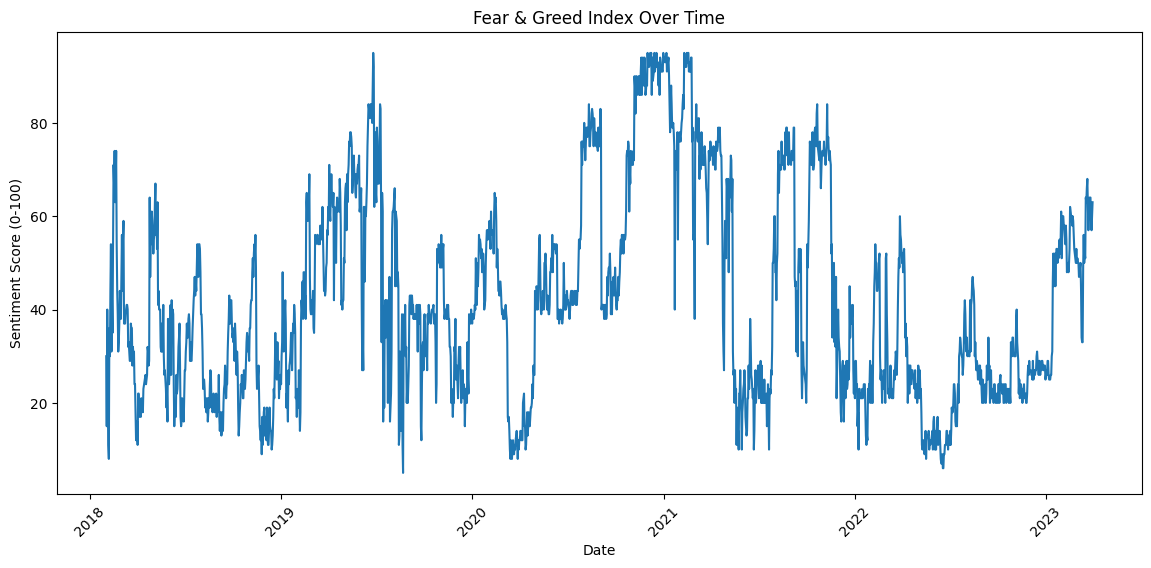

In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize=(14,6))
plt.plot(sentiment_df['Date'], sentiment_df['Sentiment_Value'])
plt.title('Fear & Greed Index Over Time')
plt.xlabel('Date')
plt.ylabel('Sentiment Score (0-100)')
plt.xticks(rotation=45)
plt.savefig('/content/ds_Khushi_Sharma/outputs/fear_greed_over_time.png')
plt.show()

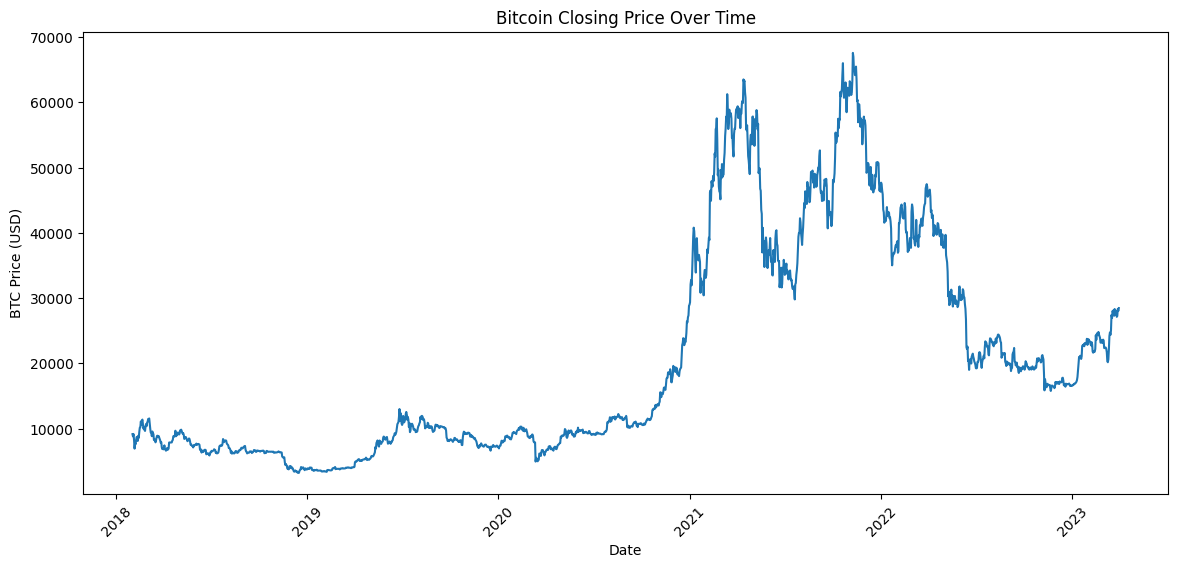

In [10]:
plt.figure(figsize=(14,6))
plt.plot(sentiment_df['Date'], sentiment_df['BTC_Close'])
plt.title('Bitcoin Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('BTC Price (USD)')
plt.xticks(rotation=45)
plt.savefig('/content/ds_Khushi_Sharma/outputs/btc_price_over_time.png')
plt.show()

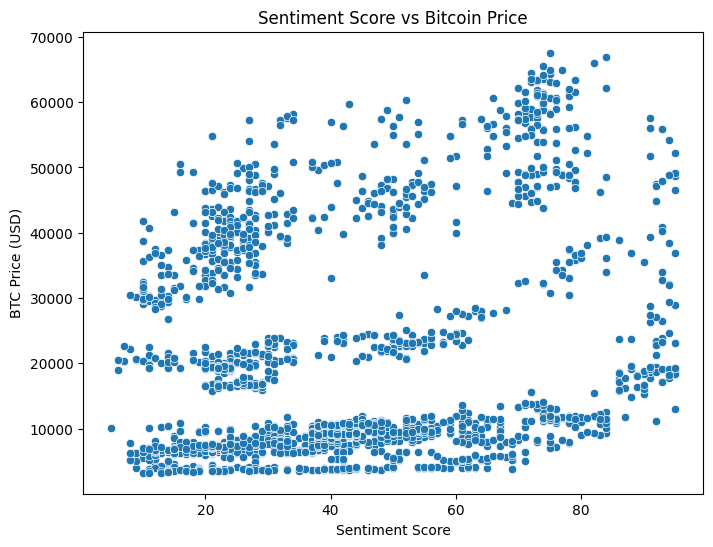

In [12]:
import seaborn as sns
plt.figure(figsize=(8,6))
sns.scatterplot(
    x='Sentiment_Value',
    y='BTC_Close',
    data=sentiment_df
)
plt.title('Sentiment Score vs Bitcoin Price')
plt.xlabel('Sentiment Score')
plt.ylabel('BTC Price (USD)')
plt.savefig('/content/ds_Khushi_Sharma/outputs/sentiment_vs_price_scatter.png')
plt.show()

In [13]:
corr = sentiment_df['Sentiment_Value'].corr(sentiment_df['BTC_Close'])
corr

np.float64(0.24359063488550264)

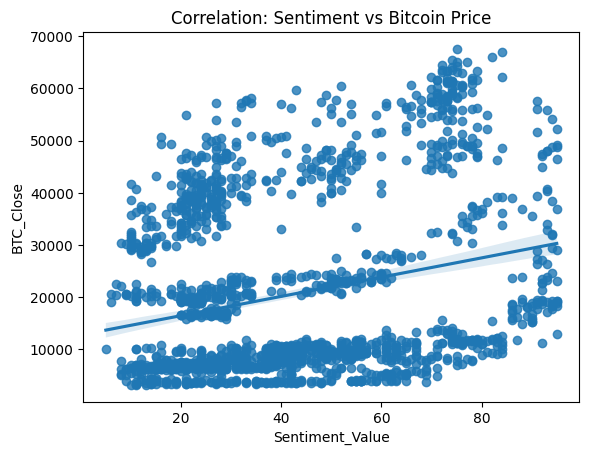

In [14]:
sns.regplot(x='Sentiment_Value', y='BTC_Close', data=sentiment_df)
plt.title('Correlation: Sentiment vs Bitcoin Price')
plt.show()

In [15]:
sentiment_df.to_csv('/content/ds_Khushi_Sharma/csv_files/clean_sentiment_data.csv', index=False)

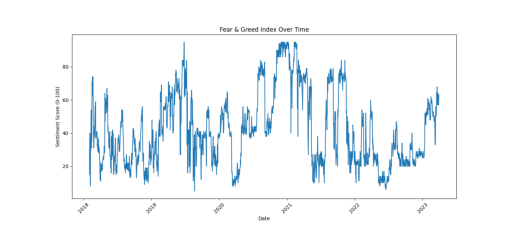

In [16]:
from PIL import Image
img = Image.open('/content/ds_Khushi_Sharma/outputs/fear_greed_over_time.png')
plt.imshow(img)
plt.axis('off')
plt.show()

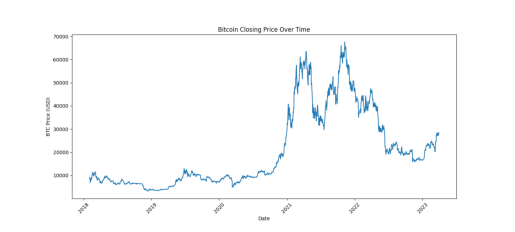

In [17]:
img = Image.open('/content/ds_Khushi_Sharma/outputs/btc_price_over_time.png')
plt.imshow(img)
plt.axis('off')
plt.show()

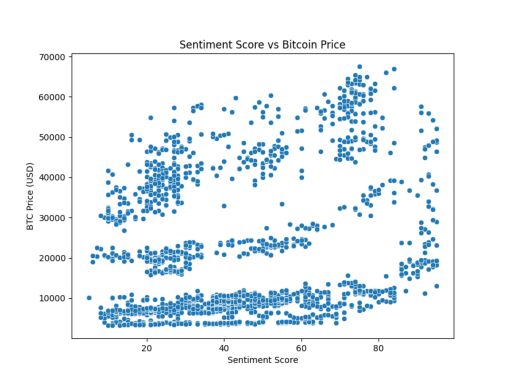

In [18]:
img = Image.open('/content/ds_Khushi_Sharma/outputs/sentiment_vs_price_scatter.png')
plt.imshow(img)
plt.axis('off')
plt.show()

In [19]:
from google.colab import files
files.download('/content/ds_Khushi_Sharma/csv_files/clean_sentiment_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [20]:
!zip -r sentiment_outputs.zip /content/ds_Khushi_Sharma/outputs

  adding: content/ds_Khushi_Sharma/outputs/ (stored 0%)
  adding: content/ds_Khushi_Sharma/outputs/sentiment_vs_price_scatter.png (deflated 5%)
  adding: content/ds_Khushi_Sharma/outputs/btc_price_over_time.png (deflated 8%)
  adding: content/ds_Khushi_Sharma/outputs/fear_greed_over_time.png (deflated 3%)


In [21]:
files.download('sentiment_outputs.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Summary of Market Sentiment Analysis

The Fear & Greed Index fluctuates significantly over time, showing frequent shifts in market psychology.

Sustained Greed periods (especially in 2021) align with Bitcoin bull runs and price peaks above $60K.

Extended Fear phases (especially in 2022) correspond to major price declines and market corrections.

Correlation between sentiment score and Bitcoin price is positive but moderate (~0.24), meaning:

Higher Greed typically reflects higher prices

However, sentiment alone does not fully explain price behavior

Visualizations reveal that trader psychology influences markets, but macro and liquidity events still drive volatility